In [5]:
import pandas as pd
import numpy as np
from libs import data_loading_maristany, functions, data_loading_generated
from libs.data_loading_generated import calculate_features_simulation, calculate_features_simulation_v2
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
import copy

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.metrics import mean_squared_error

import math

In [6]:
def clear_df(data_df):
    columns_to_drop = []
    for column_name in data_df.columns:
        if not isinstance(data_df.iloc[0][column_name], np.number) and column_name != "seq" and  not column_name.endswith("_T"):
            columns_to_drop.append(column_name)
    data_df = data_df.drop(labels=columns_to_drop, axis=1)
    data_df

In [7]:
N_COLS = 3

def plot_tests(model, Test, test_genes, columns_pred, title_name="Dense concentration"):
    
    N_ROWS = math.ceil(len(test_genes)/ N_COLS)
   
   

   
    # if N_ROWS==1:
    #     N_ROWS+=1
   
    r_n, c_n = 0, 0
    fig_h = 10 * N_ROWS
    fig, axes = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(25, fig_h), squeeze=False)
    for i, gene_name in enumerate(test_genes):
        axes[r_n, c_n].scatter(Test[Test.gene == gene_name]["temp"],
                               Test[Test.gene == gene_name]["dense_conc"],
                               marker='o',
                               label ="True")
        axes[r_n, c_n].scatter(Test[Test.gene == gene_name]["temp"],
                               model.predict(Test[Test.gene==gene_name][columns_pred + ['temp']]),
                               marker='x',
                               label ="Predicted")
        
        axes[r_n, c_n].set_title(f"Gene {gene_name}")
        axes[r_n, c_n].set_xlabel("Temperature")
        axes[r_n, c_n].set_ylabel(f"{title_name}")
        axes[r_n, c_n].legend()
        c_n += 1
        if c_n >= 3:
            c_n=0
            r_n+=1
       
    
    fig.text(0.5, 0.04, "data", ha="center", va="center")
    fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
    fig.suptitle(f"Support Vector Regression for {title_name}", fontsize=14)
    plt.show()

In [37]:
data_df = calculate_features_simulation("configs/features_config.json", "data/FINISHED_SIMULATIONS/", calc_type="v3")
columns_to_drop = []
for column_name in data_df.columns:
    if not isinstance(data_df.iloc[0][column_name], np.number) and column_name != "seq" and  not column_name.endswith("_T") and not column_name.endswith("_D"):
        columns_to_drop.append(column_name)
data_df = data_df.drop(labels=columns_to_drop, axis=1)
del data_df['charge_segregation_kappa(S)']

Skipping line due to IndexError:   8 0.15
Skipping line due to IndexError:   22
Skipping line due to IndexError:   25 0.49
Skipping line due to ValueError:   18 0.35 363.725 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [9]:
data_df.head()

,seq,170.0_T,190.0_T,200.0_T,205.0_T,210.0_T,215.0_T,ct,arginine_count(C),molecular_weight(BP),...,307.0_T,314.0_T,321.0_T,328.0_T,335.0_T,342.0_T,349.0_T,356.0_T,363.0_T,370.0_T
CCMM_SYNE7_-10s+10t,PPVIVRTTPAATADFHTTPTPTPLRPTTSEATTVTAYNGQGRLTTE...,"{'conc': {'dilute_conc': 9.68720511649155e-07,...",{'conc': {'dilute_conc': 2.6153428987040463e-0...,{'conc': {'dilute_conc': 8.243248329884717e-06...,{'conc': {'dilute_conc': 5.455603450586264e-06...,{'conc': {'dilute_conc': 0.0005501849107073831...,{'conc': {'dilute_conc': 0.0006545707243947007...,236.99,0.098765,8920.9116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCMM_SYNE7_-5t+5s,PPVIVRSTPAASADFHSSPSPSPLRPSSSEATSVSAYNGQGRLSSE...,{'conc': {'dilute_conc': 1.0868564561940133e-0...,{'conc': {'dilute_conc': 3.2212674108638426e-0...,{'conc': {'dilute_conc': 2.172423744855967e-06...,{'conc': {'dilute_conc': 9.941284730913641e-06...,{'conc': {'dilute_conc': 0.0004818503263204225...,NaN,240.22,0.098765,8710.5126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEP3_-5S+5T,MGLSFTGARPCCCRNNVLITDDGEVVSLTAHDFDVVDIETEEEGNF...,NaN,"{'conc': {'dilute_conc': 0.017187570704742458,...","{'conc': {'dilute_conc': 0.032879411220571614,...",NaN,NaN,"{'conc': {'dilute_conc': 0.09697021206664574, ...",228.94,0.104167,10556.6494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEP3_HHV11_P04289_Wildtype,MGLSFSGARPCCCRNNVLITDDGEVVSLTAHDFDVVDIESEEEGNF...,NaN,NaN,NaN,NaN,NaN,NaN,224.50,0.104167,10486.5164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGAS_-5Q+5N,MQPWHGKAMNRASEAGATAPKASARNARGAPMDPTESPAAPEAALP...,"{'conc': {'dilute_conc': 0.0, 'dense_conc': 0....",{'conc': {'dilute_conc': 0.0028438205892776383...,"{'conc': {'dilute_conc': 0.08223138588301507, ...",NaN,NaN,NaN,216.44,0.100671,15267.9303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
temp_columns = [cn for cn in data_df.columns if cn.endswith("_T")]
#dens_columns = [cn for cn in data_df.columns if cn.endswith("_D")]
ct_columns = [cn for cn in data_df.columns if cn == 'ct']
    
x_columns = [cn for cn in data_df.columns if cn not in temp_columns + ['seq'] + ct_columns]

In [11]:
new_rows = []
for gene_name, row in data_df.iterrows():
   for temp_column_name in temp_columns:
       if not pd.isna(row[temp_column_name]):
           conc_dilute = row[temp_column_name]['conc']['dilute_conc']
           dense_conc = row[temp_column_name]['conc']['dense_conc']
           var_dilute = row[temp_column_name]['conc']['var_dilute']
           var_dense = row[temp_column_name]['conc']['var_dense']
           density = row[temp_column_name]['density']
           density = {str(i) + "_D": d for i, d in enumerate(density)}
           new_rows.append(pd.concat([pd.Series({"gene": gene_name}),
                                   row[x_columns + ct_columns],
                                   pd.Series({"temp": temp_column_name.split("_")[0], 
                                             'conc_dilute': conc_dilute,
                                             'dense_conc': dense_conc,
                                              **density})]))
data_df_ext = pd.DataFrame(new_rows)
# del data_df_ext['charge_segregation_kappa(S)']
# x_columns.remove('charge_segregation_kappa(S)')
# data_df_ext["temp"] = data_df_ext["temp"].astype(float)

In [12]:
data_df_ext.head()

,gene,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),...,40_D,41_D,42_D,43_D,44_D,45_D,46_D,47_D,48_D,49_D
0,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.17284,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.17284,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.17284,...,0.000011,0.000001,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.17284,...,0.000034,0.000005,0.000001,2.443236e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.17284,...,0.000454,0.000491,0.000406,3.486735e-04,0.000397,0.000586,0.000677,0.000661,0.000681,0.000679


In [13]:
data_df_ext_scaled = data_df_ext.copy(deep=True)
corr_matrix = data_df_ext[x_columns].corr().abs()
cols_to_del = []
for name, row in corr_matrix.iterrows():
    if name not in cols_to_del:
        for c, v in row.items():
            if v > 0.9 and name != c:
                print(name, c, v)
                cols_to_del.append(c)
shr_cols = [col for col in x_columns if col not in cols_to_del]

arginine_count(C) fraction_of_charged_residues(S) 0.9740368983591433
arginine_count(C) fraction_of_positive_residues(S) 0.9568124031284101
arginine_count(C) fraction_polar(S) 0.9094116379379076
arginine_count(C) compute_iwd_charged_weighted_+(S) 0.9767749864777155
arginine_count(C) compute_bivariate_iwd_charged_weighted(S) 0.9531271496791257
molecular_weight(BP) length(BP) 0.9524135853845584
aromaticity(BP) fraction_aliphatic(S) 0.9129575158821387
aromaticity(BP) asphericity(SP) 0.9713501778294901
aromaticity(BP) scaling_exponent(SP) 0.9592304271847545
aromaticity(BP) prefactor(SP) 0.9112125629258864
net_charge(BP) net_charge_per_residue(S) 0.9691858010844673
net_charge(BP) sequence_charge_decoration_1(S) 0.9548759971483232
hydropathy_index(BP) hydrophobicity(S) 0.9999999999999998
fraction_of_negative_residues(S) fraction_of_charged_residues(S) 0.9370201507804377
fraction_proline(S) fraction_polar(S) 0.9197614182729151
complexity(S) fraction_polar(S) 0.9074115902554952
radius_of_gyrati

In [14]:
scaler = StandardScaler()
normalizer = Normalizer()

In [15]:
shr_cols

['arginine_count(C)',
 'molecular_weight(BP)',
 'isoelectric_pint(BP)',
 'aromaticity(BP)',
 'net_charge(BP)',
 'hydropathy_index(BP)',
 'instability_index(BP)',
 'fraction_of_negative_residues(S)',
 'sequence_charge_decoration_2(S)',
 'fraction_proline(S)',
 'complexity(S)',
 'compute_iwd_charged_weighted_-(S)',
 'radius_of_gyration(SP)']

In [16]:
scaler.fit(data_df_ext[shr_cols + ["temp"]])
data_df_ext_scaled = data_df_ext.copy(deep=True)
data_df_ext_scaled[shr_cols + ["temp"]] = scaler.transform(data_df_ext[shr_cols + ["temp"]])

In [17]:
data_df_ext_scaled

,gene,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),...,40_D,41_D,42_D,43_D,44_D,45_D,46_D,47_D,48_D,49_D
0,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.172840,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.172840,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.172840,...,0.000011,0.000001,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.172840,...,0.000034,0.000005,0.000001,2.443236e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.172840,...,0.000454,0.000491,0.000406,3.486735e-04,0.000397,0.000586,0.000677,0.000661,0.000681,0.000679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,TIA_Wildtype,-0.721634,-0.434741,-1.637551,2.116676,-0.594849,-1.821198,97,0.167763,0.020619,...,0.014582,0.037849,0.092133,1.923605e-01,0.333143,0.474417,0.571489,0.619030,0.632148,0.629671
88,TIA_Wildtype,-0.721634,-0.434741,-1.637551,2.116676,-0.594849,-1.821198,97,0.167763,0.020619,...,0.022991,0.056776,0.121624,2.222366e-01,0.346566,0.465141,0.548867,0.590893,0.598788,0.591461
89,TIA_Wildtype,-0.721634,-0.434741,-1.637551,2.116676,-0.594849,-1.821198,97,0.167763,0.020619,...,0.014650,0.025996,0.052561,1.038473e-01,0.184038,0.288943,0.395972,0.481304,0.531462,0.555758
90,TIA_Wildtype,-0.721634,-0.434741,-1.637551,2.116676,-0.594849,-1.821198,97,0.167763,0.020619,...,0.043941,0.072999,0.113976,1.647525e-01,0.218544,0.269060,0.312336,0.348113,0.379756,0.406277


In [18]:
dens_columns = [cn for cn in data_df_ext.columns if cn.endswith("_D")]
dens_columns

['0_D',
 '1_D',
 '2_D',
 '3_D',
 '4_D',
 '5_D',
 '6_D',
 '7_D',
 '8_D',
 '9_D',
 '10_D',
 '11_D',
 '12_D',
 '13_D',
 '14_D',
 '15_D',
 '16_D',
 '17_D',
 '18_D',
 '19_D',
 '20_D',
 '21_D',
 '22_D',
 '23_D',
 '24_D',
 '25_D',
 '26_D',
 '27_D',
 '28_D',
 '29_D',
 '30_D',
 '31_D',
 '32_D',
 '33_D',
 '34_D',
 '35_D',
 '36_D',
 '37_D',
 '38_D',
 '39_D',
 '40_D',
 '41_D',
 '42_D',
 '43_D',
 '44_D',
 '45_D',
 '46_D',
 '47_D',
 '48_D',
 '49_D']

In [20]:
scaler_n = StandardScaler()


In [21]:
scaler_n.fit(data_df_ext_scaled[dens_columns])
data_df_ext_scaled_d = data_df_ext_scaled.copy(deep=True)
data_df_ext_scaled_d[dens_columns] = scaler_n.transform(data_df_ext_scaled_d[dens_columns])

In [22]:
data_df_ext_scaled_d.iloc[:15]

,gene,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),...,40_D,41_D,42_D,43_D,44_D,45_D,46_D,47_D,48_D,49_D
0,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.17284,...,-0.406889,-0.422810,-0.446920,-0.430300,-0.422206,-0.436220,-0.449560,-0.455005,-0.455346,-0.454483
1,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.17284,...,-0.406889,-0.422810,-0.446920,-0.430300,-0.422206,-0.436220,-0.449560,-0.455005,-0.455346,-0.454483
2,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.17284,...,-0.406755,-0.422792,-0.446920,-0.430300,-0.422206,-0.436220,-0.449560,-0.455005,-0.455346,-0.454483
3,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.17284,...,-0.406471,-0.422738,-0.446906,-0.430298,-0.422206,-0.436220,-0.449560,-0.455005,-0.455346,-0.454483
4,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.17284,...,-0.401307,-0.416373,-0.442080,-0.427265,-0.419637,-0.433102,-0.446414,-0.452189,-0.452560,-0.451737
5,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.17284,...,-0.393055,-0.411217,-0.438439,-0.425764,-0.420197,-0.434791,-0.448048,-0.452614,-0.452636,-0.451680
6,CCMM_SYNE7_-5t+5s,1.635114,-1.887801,1.178113,-0.402507,0.693159,0.440732,81,2.114935,0.17284,...,-0.406889,-0.422810,-0.446920,-0.430300,-0.422206,-0.436220,-0.449560,-0.455005,-0.455346,-0.454483
7,CCMM_SYNE7_-5t+5s,1.635114,-1.887801,1.178113,-0.402507,0.693159,0.440732,81,2.114935,0.17284,...,-0.404574,-0.420712,-0.445249,-0.429719,-0.422124,-0.436205,-0.449557,-0.455005,-0.455346,-0.454483
8,CCMM_SYNE7_-5t+5s,1.635114,-1.887801,1.178113,-0.402507,0.693159,0.440732,81,2.114935,0.17284,...,-0.405991,-0.422684,-0.446919,-0.430300,-0.422206,-0.436220,-0.449560,-0.455005,-0.455346,-0.454483
9,CCMM_SYNE7_-5t+5s,1.635114,-1.887801,1.178113,-0.402507,0.693159,0.440732,81,2.114935,0.17284,...,-0.401314,-0.421285,-0.446595,-0.430228,-0.422204,-0.436220,-0.449560,-0.455005,-0.455346,-0.454483


In [23]:
genelist = data_df_ext_scaled["gene"].unique()
Train, Test = train_test_split(genelist, train_size=0.8, random_state=1, shuffle=True)

train_genes = copy.deepcopy(Train)
test_genes = copy.deepcopy(Test)

Train = data_df_ext_scaled_d[data_df_ext_scaled_d['gene'].isin(Train)]
Test = data_df_ext_scaled_d[data_df_ext_scaled_d['gene'].isin(Test)]

X_train = Train[shr_cols+["temp"]]
X_test = Test[shr_cols+["temp"]]


In [24]:
X_train

,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),instability_index(BP),fraction_of_negative_residues(S),sequence_charge_decoration_2(S),fraction_proline(S),complexity(S),compute_iwd_charged_weighted_-(S),radius_of_gyration(SP),temp
0,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,-0.957694,0.816817,-1.953767,0.913274,1.404306,-0.179558,-0.616207,-1.162926
1,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,-0.957694,0.816817,-1.953767,0.913274,1.404306,-0.179558,-0.616207,-0.755270
2,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,-0.957694,0.816817,-1.953767,0.913274,1.404306,-0.179558,-0.616207,-0.551443
3,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,-0.957694,0.816817,-1.953767,0.913274,1.404306,-0.179558,-0.616207,-0.449529
4,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,-0.957694,0.816817,-1.953767,0.913274,1.404306,-0.179558,-0.616207,-0.347615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.721634,-0.434741,-1.637551,2.116676,-0.594849,-1.821198,0.167763,-0.660377,0.500442,0.958823,0.376752,-0.297614,-1.559055,2.342911
88,-0.721634,-0.434741,-1.637551,2.116676,-0.594849,-1.821198,0.167763,-0.660377,0.500442,0.958823,0.376752,-0.297614,-1.559055,2.485590
89,-0.721634,-0.434741,-1.637551,2.116676,-0.594849,-1.821198,0.167763,-0.660377,0.500442,0.958823,0.376752,-0.297614,-1.559055,2.628270
90,-0.721634,-0.434741,-1.637551,2.116676,-0.594849,-1.821198,0.167763,-0.660377,0.500442,0.958823,0.376752,-0.297614,-1.559055,2.770949


In [26]:
X_test.head()

,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),instability_index(BP),fraction_of_negative_residues(S),sequence_charge_decoration_2(S),fraction_proline(S),complexity(S),compute_iwd_charged_weighted_-(S),radius_of_gyration(SP),temp
12,1.779019,-0.656299,-1.943627,-0.664023,-1.634366,0.167924,0.810862,3.233025,-1.692091,0.982309,2.134114,4.126696,-0.024289,-0.755270
13,1.779019,-0.656299,-1.943627,-0.664023,-1.634366,0.167924,0.810862,3.233025,-1.692091,0.982309,2.134114,4.126696,-0.024289,-0.551443
14,1.779019,-0.656299,-1.943627,-0.664023,-1.634366,0.167924,0.810862,3.233025,-1.692091,0.982309,2.134114,4.126696,-0.024289,-0.245701
15,1.779019,-0.656299,-1.943627,-0.664023,-1.634366,0.167924,0.810862,3.233025,-1.692091,0.982309,2.134114,4.126696,-0.024289,-0.959098
16,1.779019,-0.656299,-1.943627,-0.664023,-1.634366,0.167924,0.810862,3.233025,-1.692091,0.982309,2.134114,4.126696,-0.024289,-0.143787


In [27]:
for dens in dens_columns:
    y_train = Train[dens]
    y_test = Test[dens]
    svr_rbf = SVR(C=5, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)
    svr_rbf.fit(X_train, y_train)
    print(dens, svr_rbf.score(X_train, y_train), svr_rbf.score(X_test, y_test))
    #print(y_test, svr_rbf.score(X_test, y_test))
    # print()

0_D 0.9849771010647635 -4.6582495049264265
1_D 0.9880108972180607 -4.801659701111824
2_D 0.9903521081383078 -4.993526029625569
3_D 0.9920399871517305 -3.8211410282928675
4_D 0.9927910612565604 -2.315893566460524
5_D 0.9927944872144183 -1.0536841546398104
6_D 0.9897712314451087 0.07663443370265399
7_D 0.9720301522167494 0.29744693503221775
8_D 0.9149642639982496 0.286450934774812
9_D 0.8222578189867265 0.216929181236181
10_D 0.7389064317911913 0.1258736768539087
11_D 0.6918865802547306 0.1573262088282824
12_D 0.6515835295654392 0.1628674652565293
13_D 0.6265960611181595 0.20030081727736593
14_D 0.648887071423 0.0963061644444696
15_D 0.7024502098776428 -0.45216048178081425
16_D 0.7776003825270572 -1.379716749777118
17_D 0.8551920441725516 -1.7863440054133202
18_D 0.9563822307696699 -0.7988433271162718
19_D 0.976694047339735 -0.15911251093074763
20_D 0.9825943795860199 0.05028869049198814
21_D 0.98658063687009 0.10083997418154456
22_D 0.9901679087052431 0.060614369465269324
23_D 0.9930837

In [30]:
test_df = data_df_ext[data_df_ext.gene == 'CCMM_SYNE7_-10s+10t']
test_df = test_df.sort_values(by="temp")

INFO - 2024-08-25 15:04:38,867 - matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 2024-08-25 15:04:38,869 - matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 2024-08-25 15:04:38,873 - matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 2024-08-25 15:04:38,877 - matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 2024-08-25 15:04:

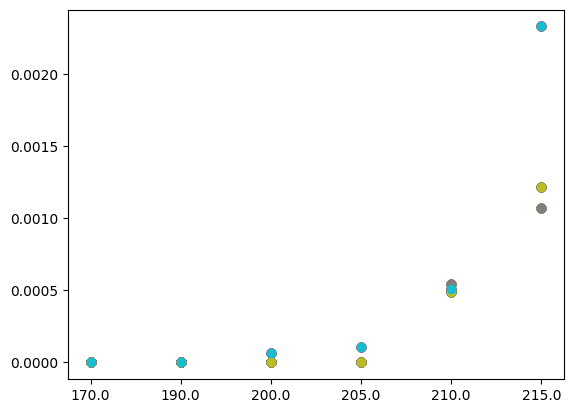

In [31]:
for c_n in dens_columns:
    plt.scatter(test_df["temp"], test_df["1_D"])
    plt.scatter(test_df["temp"], test_df["2_D"])
    plt.scatter(test_df["temp"], test_df["5_D"])

In [32]:
test_df["temp"] = test_df["temp"].astype(float)

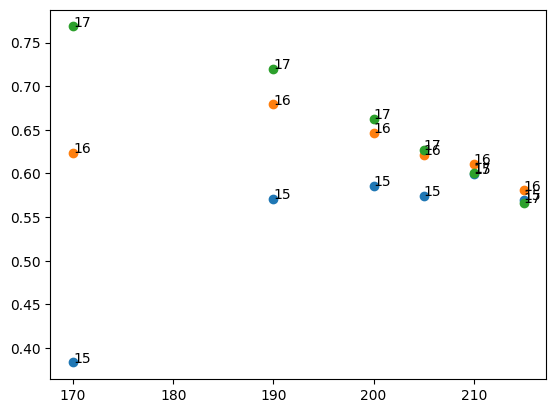

In [33]:

for i, c_n in enumerate(dens_columns):
    if i > 14 and i < 18:
        plt.scatter(test_df["temp"], test_df[c_n])
        n = [i for _ in range(len(test_df["temp"]))]
        for i, txt in enumerate(n):
            plt.annotate(txt, (test_df["temp"][i], test_df[c_n][i]))
        plt.xlabel = "temp"
        plt.ylabel = "dens"
plt.xlabel = "temp"
plt.ylabel = "dens"
plt.show()
        
    # if i == 12:
    #     break

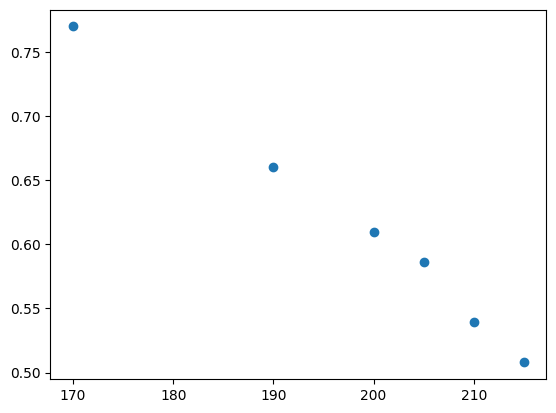

In [34]:
plt.scatter(test_df["temp"], test_df["20_D"])

In [61]:
data_df_ext["temp"]

0     170.0
1     190.0
2     200.0
3     205.0
4     210.0
      ...  
87    342.0
88    349.0
89    356.0
90    363.0
91    370.0
Name: temp, Length: 92, dtype: object